In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, precision_recall_curve
import joblib

In [2]:
# Step 1: Load and validate data
column_names = [
    "lp", "v", "GTT", "GTn", "GGn", "Ts", "Tp", "T48", "T1", "T2",
    "P48", "P1", "P2", "Pexh", "TIC", "mf", "kMc", "kMt"
]
df = pd.read_csv(
    r'C:\Users\essie\Desktop\Data science\Ship\UCI CBM Dataset\data.txt',
    delim_whitespace=True,
    header=None,
    names=column_names
)

In [18]:
df.head()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lp      11934 non-null  float64
 1   v       11934 non-null  float64
 2   GTT     11934 non-null  float64
 3   GTn     11934 non-null  float64
 4   GGn     11934 non-null  float64
 5   Ts      11934 non-null  float64
 6   Tp      11934 non-null  float64
 7   T48     11934 non-null  float64
 8   T1      11934 non-null  float64
 9   T2      11934 non-null  float64
 10  P48     11934 non-null  float64
 11  P1      11934 non-null  float64
 12  P2      11934 non-null  float64
 13  Pexh    11934 non-null  float64
 14  TIC     11934 non-null  float64
 15  mf      11934 non-null  float64
 16  kMc     11934 non-null  float64
 17  kMt     11934 non-null  float64
dtypes: float64(18)
memory usage: 1.6 MB


In [26]:
print("Checking for missing values:\n", df.isnull().sum())
print("\nkMc and kMt Distribution:")
print(df[['kMc', 'kMt']].describe())
print("\nkMc Value Counts:")
print(df['kMc'].value_counts())

Checking for missing values:
 lp      0
v       0
GTT     0
GTn     0
GGn     0
Ts      0
Tp      0
T48     0
T1      0
T2      0
P48     0
P1      0
P2      0
Pexh    0
TIC     0
mf      0
kMc     0
kMt     0
dtype: int64

kMc and kMt Distribution:
               kMc         kMt
count  11934.00000  11934.0000
mean       0.97500      0.9875
std        0.01472      0.0075
min        0.95000      0.9750
25%        0.96200      0.9810
50%        0.97500      0.9875
75%        0.98800      0.9940
max        1.00000      1.0000

kMc Value Counts:
kMc
0.950    234
0.988    234
0.978    234
0.979    234
0.980    234
0.981    234
0.982    234
0.983    234
0.984    234
0.985    234
0.986    234
0.987    234
0.989    234
0.976    234
0.990    234
0.991    234
0.992    234
0.993    234
0.994    234
0.995    234
0.996    234
0.997    234
0.998    234
0.999    234
0.977    234
0.975    234
0.951    234
0.962    234
0.952    234
0.953    234
0.954    234
0.955    234
0.956    234
0.957    234
0.958 

In [20]:
df.describe()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


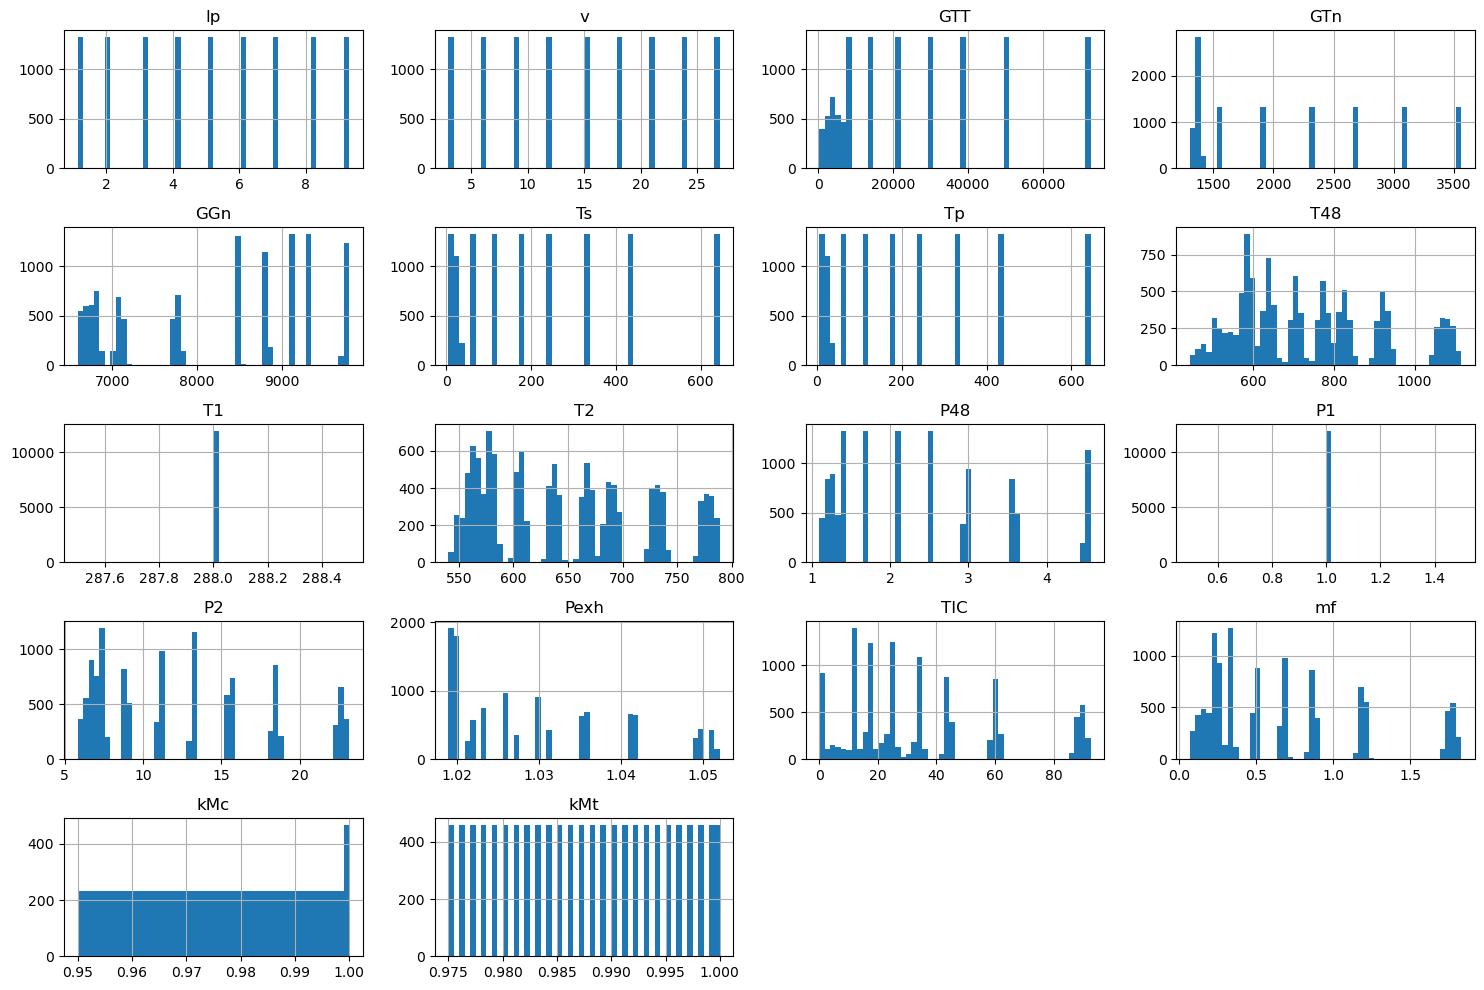

In [21]:
df.hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

<Axes: xlabel='T48'>

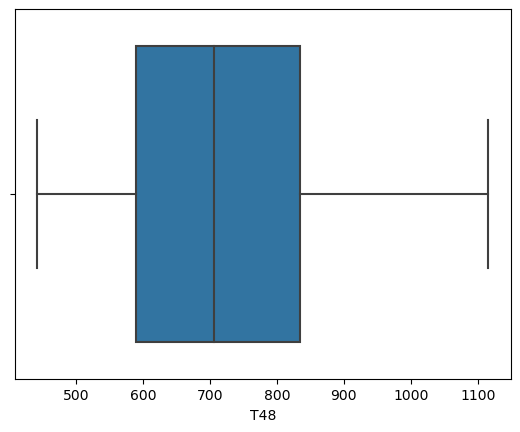

In [24]:
sns.boxplot(x=df["T48"])

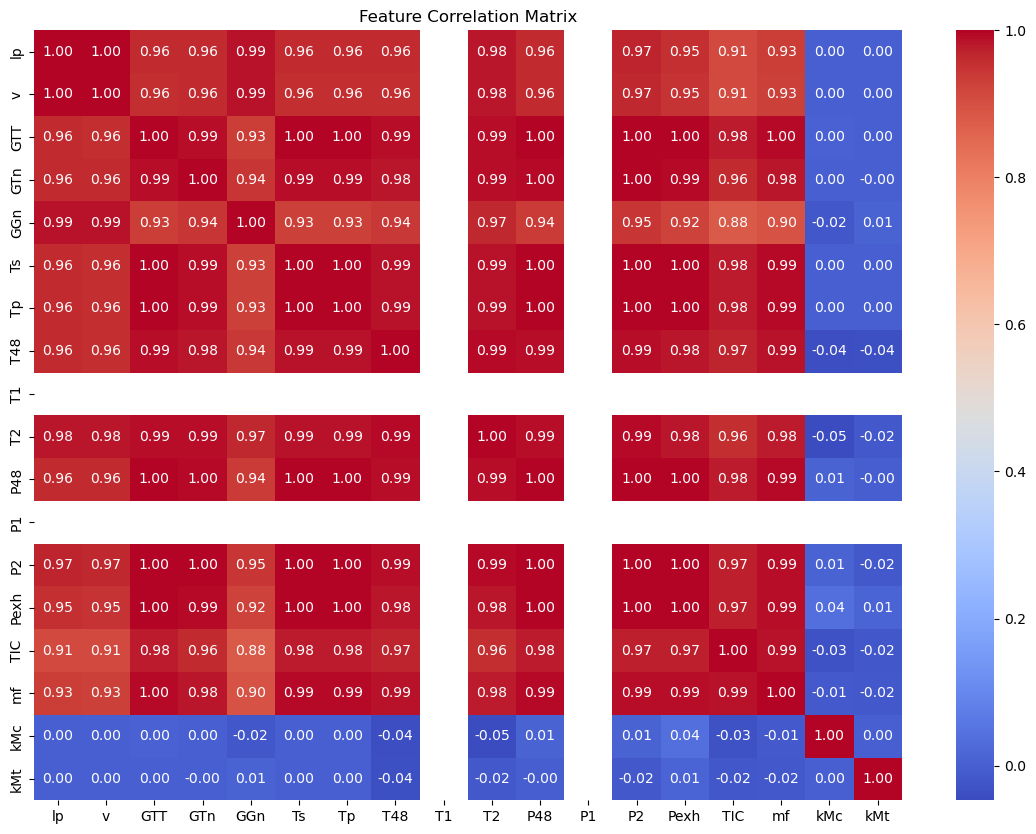

In [27]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

C:\Users\essie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


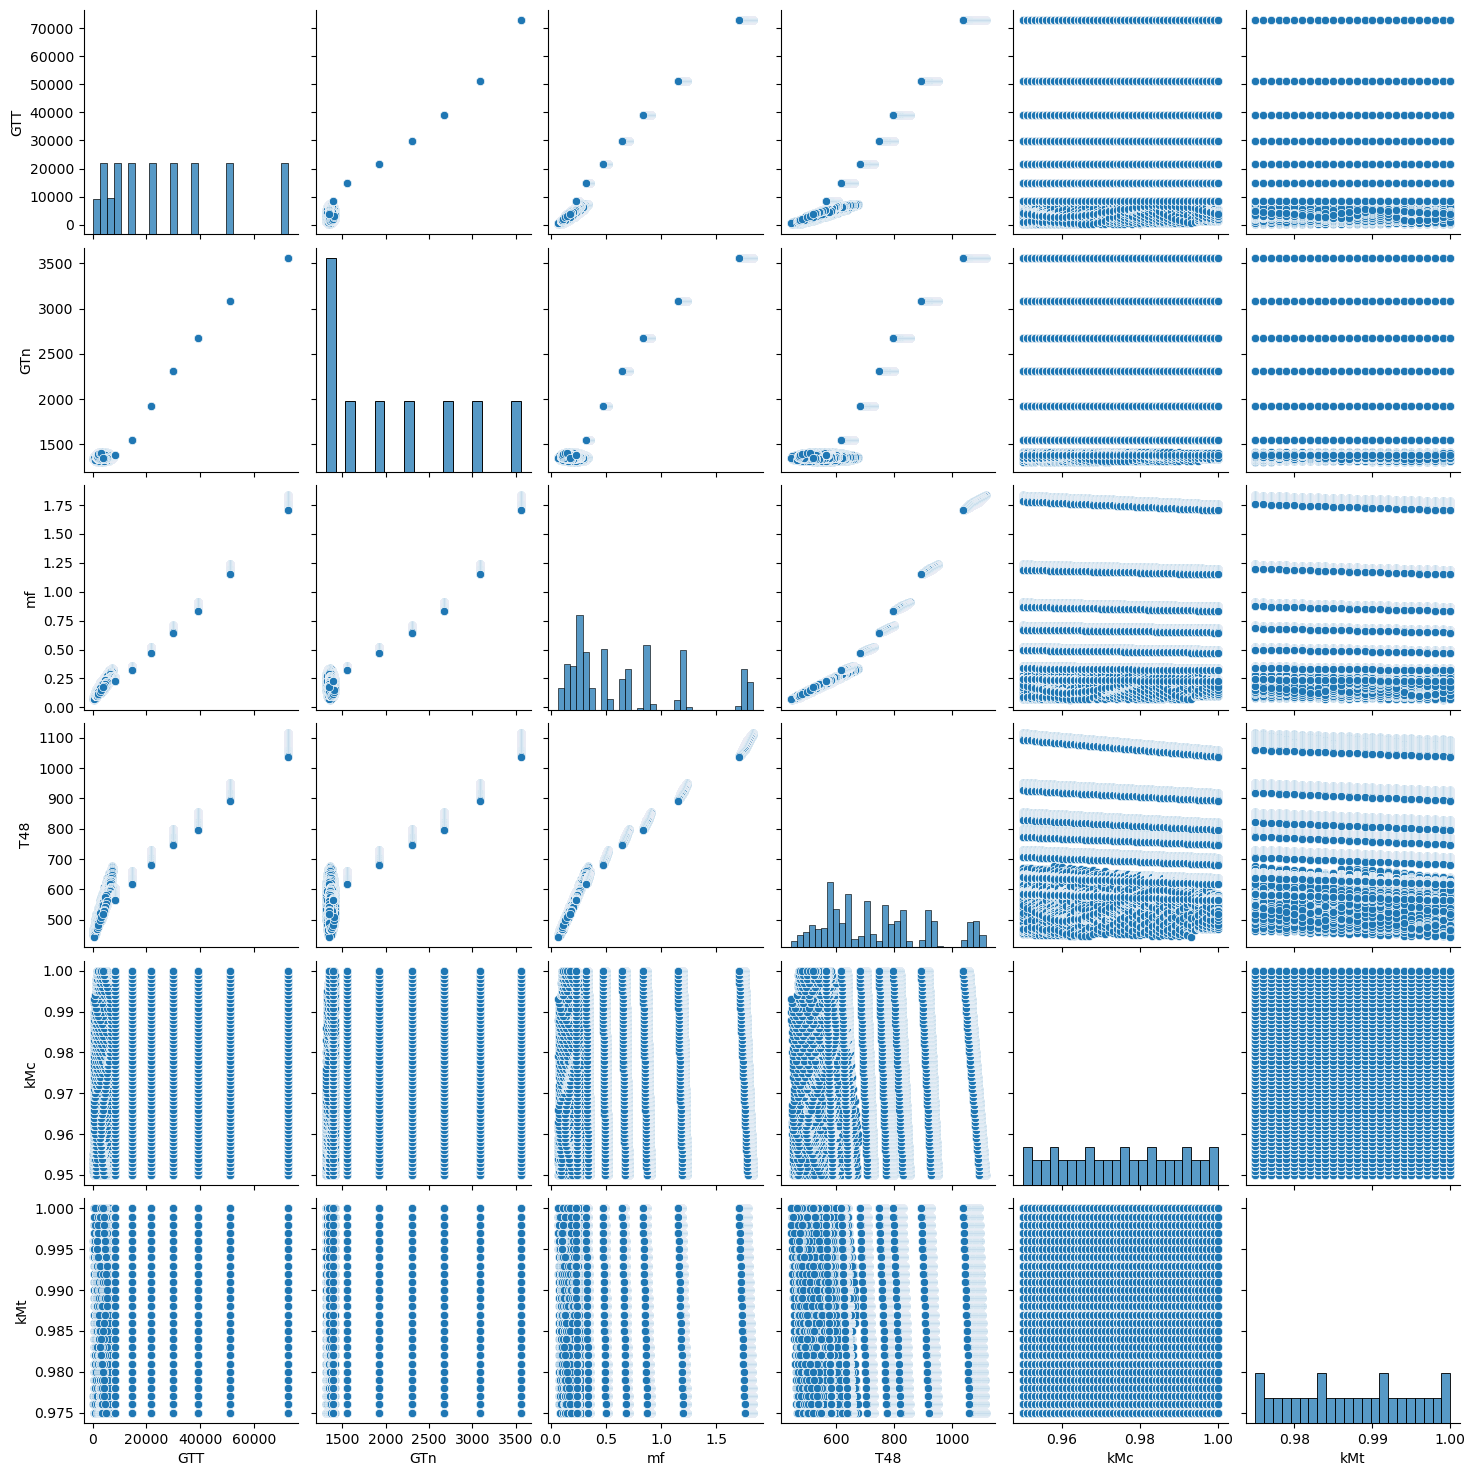

In [28]:
sns.pairplot(df[["GTT", "GTn", "mf", "T48", "kMc", "kMt"]])

<Axes: xlabel='mf', ylabel='kMc'>

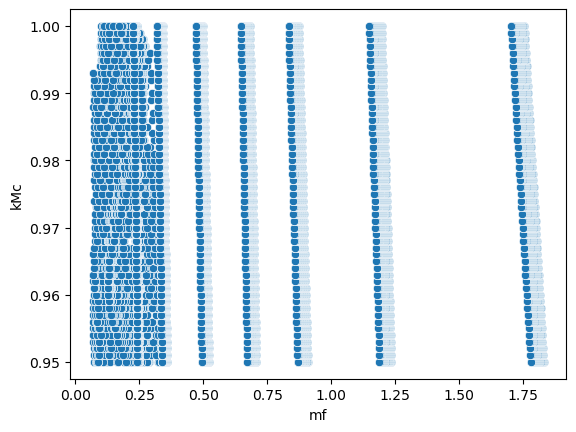

In [29]:
sns.scatterplot(data=df, x="mf", y="kMc")

In [4]:
features = ['lp', 'v', 'GTT', 'GTn', 'GGn', 'Ts', 'Tp', 'T48', 'T1', 'T2', 'P48', 'P1', 'P2', 'Pexh', 'TIC', 'mf']
targets = ['kMc', 'kMt']

In [5]:
# Step 2: Prepare the data
X = df[features]
y_kmc = df['kMc']
y_kmt = df['kMt']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

X_train, X_test, y_kmc_train, y_kmc_test = train_test_split(X_scaled, y_kmc, test_size=0.2, random_state=42)
_, _, y_kmt_train, y_kmt_test = train_test_split(X_scaled, y_kmt, test_size=0.2, random_state=42)

In [6]:
# Step 3: Feature Selection
# Temporary Random Forest for kMt feature importance
rf_temp_kmt = RandomForestRegressor(n_estimators=50, random_state=42)
rf_temp_kmt.fit(X_train, y_kmt_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [7]:
# Feature engineering for kMc
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_scaled_kmc = pd.DataFrame(poly.fit_transform(X_scaled), columns=poly.get_feature_names_out(features))
X_train_kmc = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names_out(features))
X_test_kmc = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out(features))

In [8]:
# Select features for kMt based on importance
important_features_kmt = [f for f, imp in dict(zip(features, rf_temp_kmt.feature_importances_)).items() if imp > 0.05]
print(f"Selected Features for kMt: {important_features_kmt}")
X_scaled_kmt = X_scaled[important_features_kmt]
X_train_kmt = X_train[important_features_kmt]
X_test_kmt = X_test[important_features_kmt]

Selected Features for kMt: ['GTT', 'GTn', 'GGn', 'P2', 'Pexh', 'TIC']


In [9]:
# Step 4: Build models
# kMc: Binary classification with sample weights
y_kmc_train_binary = (y_kmc_train < 0.96028).astype(int)
y_kmc_test_binary = (y_kmc_test < 0.96028).astype(int)
clf_kmc = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42)
sample_weight = np.ones(len(y_kmc_train_binary))
sample_weight[y_kmc_train_binary == 1] = (len(y_kmc_train_binary) / sum(y_kmc_train_binary == 1))  # Weight for "Degraded"
sample_weight[y_kmc_train_binary == 0] = (len(y_kmc_train_binary) / sum(y_kmc_train_binary == 0))  # Weight for "Healthy"
clf_kmc.fit(X_train_kmc, y_kmc_train_binary, sample_weight=sample_weight)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=42)

In [10]:
# Optimize threshold for kMc
y_kmc_scores = clf_kmc.predict_proba(X_test_kmc)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_kmc_test_binary, y_kmc_scores)
optimal_idx = np.argmax(precision * recall)
optimal_threshold = thresholds[optimal_idx]
y_kmc_pred_binary = (y_kmc_scores >= optimal_threshold).astype(int)

In [11]:
# kMt: Refined hyperparameter tuning
param_dist = {
    'n_estimators': [200, 225, 250],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}
random_search_kmt = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=25,
    cv=5,  # Increased from 3
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
random_search_kmt.fit(X_train_kmt, y_kmt_train)
rf_kmt = random_search_kmt.best_estimator_
print(f"\nkMt Best Parameters: {random_search_kmt.best_params_}")
y_kmt_pred = rf_kmt.predict(X_test_kmt)


kMt Best Parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [17]:
# Log kMt feature importances
importances_kmt = dict(zip(important_features_kmt, rf_kmt.feature_importances_))
print("kMt Feature Importances:", importances_kmt)

kMt Feature Importances: {'GTT': 0.12038138865648432, 'GTn': 0.08536946774139811, 'GGn': 0.15569076607563098, 'P2': 0.4831308579155157, 'Pexh': 0.08591678674408866, 'TIC': 0.06951073286688222}


In [13]:
# Step 5: Evaluate the models
kmc_accuracy = accuracy_score(y_kmc_test_binary, y_kmc_pred_binary)
print(f"\nkMc Model - Accuracy: {kmc_accuracy:.4f} (Classification)")
cm = confusion_matrix(y_kmc_test_binary, y_kmc_pred_binary)
print("Confusion Matrix:\n", cm)

kmt_mse = mean_squared_error(y_kmt_test, y_kmt_pred)
kmt_r2 = r2_score(y_kmt_test, y_kmt_pred)
print(f"kMt Model - MSE: {kmt_mse:.6f}, R²: {kmt_r2:.4f}")


kMc Model - Accuracy: 0.9853 (Classification)
Confusion Matrix:
 [[1859   13]
 [  22  493]]
kMt Model - MSE: 0.000001, R²: 0.9905


In [14]:
# Step 5.5: Cross-Validation (10 folds)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_kmc = cross_val_score(clf_kmc, X_scaled_kmc, (y_kmc < 0.96028).astype(int), cv=cv, scoring='accuracy')
print(f"kMc Cross-Validation Accuracy: {cv_scores_kmc.mean():.4f} (±{cv_scores_kmc.std() * 2:.4f})")

cv_scores_kmt = cross_val_score(rf_kmt, X_scaled_kmt, y_kmt, cv=10, scoring='r2')
print(f"kMt Cross-Validation R²: {cv_scores_kmt.mean():.4f} (±{cv_scores_kmt.std() * 2:.4f})")

kMc Cross-Validation Accuracy: 0.9802 (±0.0061)
kMt Cross-Validation R²: 0.9460 (±0.1309)


In [15]:
# Step 6: Predictive Maintenance - Health Status
def check_health(pred, threshold, is_binary=False):
    if is_binary:
        return ["Degraded" if p == 1 else "Healthy" for p in pred]
    return ["Healthy" if p >= threshold else "Degraded" for p in pred]

kmc_health = check_health(y_kmc_pred_binary, threshold=0.96028, is_binary=True)
kmt_health = check_health(y_kmt_pred, threshold=0.985625)

print("\nHealth Status (First 5 Test Samples):")
for i in range(5):
    print(f"Sample {i+1}: kMc={y_kmc_pred_binary[i]} ({kmc_health[i]}), kMt={y_kmt_pred[i]:.3f} ({kmt_health[i]})")


Health Status (First 5 Test Samples):
Sample 1: kMc=0 (Healthy), kMt=0.987 (Healthy)
Sample 2: kMc=0 (Healthy), kMt=0.977 (Degraded)
Sample 3: kMc=0 (Healthy), kMt=0.982 (Degraded)
Sample 4: kMc=1 (Degraded), kMt=0.988 (Healthy)
Sample 5: kMc=0 (Healthy), kMt=0.990 (Healthy)


In [16]:
# Step 7: Prepare for deployment
joblib.dump(clf_kmc, 'clf_kmc_model.pkl')
rf_kmt.fit(X_scaled_kmt, y_kmt)
joblib.dump(rf_kmt, 'rf_kmt_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(important_features_kmt, 'important_features_kmt.pkl')
joblib.dump(poly, 'poly_transformer.pkl')
print("\nModels, scaler, and features saved for deployment.")


Models, scaler, and features saved for deployment.
